In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:////Users/chac/Desktop/Class/Module_10_Assignment/sqlalchemy_challenge/Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year=dt.date(2017, 8, 23)-dt.timedelta(days=365)
last_year

# Perform a query to retrieve the data and precipitation scores
last_year_data=session.query(measurement.date, measurement.prcp).\
filter(measurement.date>=last_year).\
order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data=pd.DataFrame(last_year_data, columns=["date", "precipitation"])
data.set_index("date", inplace=True)
data

# Sort the dataframe by date
data=data.sort_values(by=["date"])
data



,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

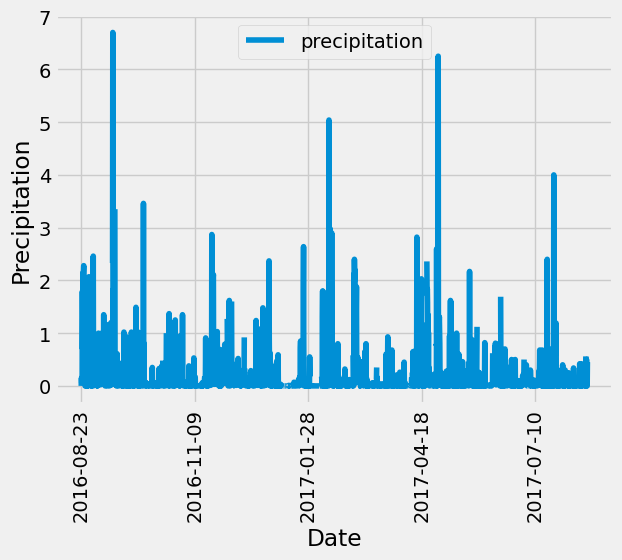

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
data.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.xticks(rotation=90)
plt.show

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
station_total=session.query(measurement.station).distinct().count()
station_total

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_active=session.query(measurement.station, 
                             func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp=[measurement.station,
      func.min(measurement.tobs),
      func.max(measurement.tobs),
      func.avg(measurement.tobs)]
active_station=session.query(*temp).filter(measurement.station == "USC00519281").all()
active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

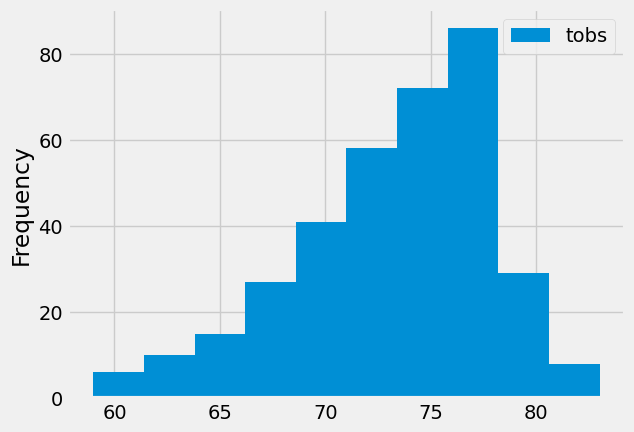

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_twelve_months=session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == "USC00519281").\
    filter(measurement.date>=last_year).\
    order_by(measurement.date).all()

last_twelve_months_df=pd.DataFrame(last_twelve_months)
last_twelve_months_df.set_index("station", inplace=True)

last_twelve_months_df.plot.hist()
plt.show

# Close Session

In [17]:
# Close Session
session.close()